In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram.csv", encoding = 'latin1')

data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [4]:
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


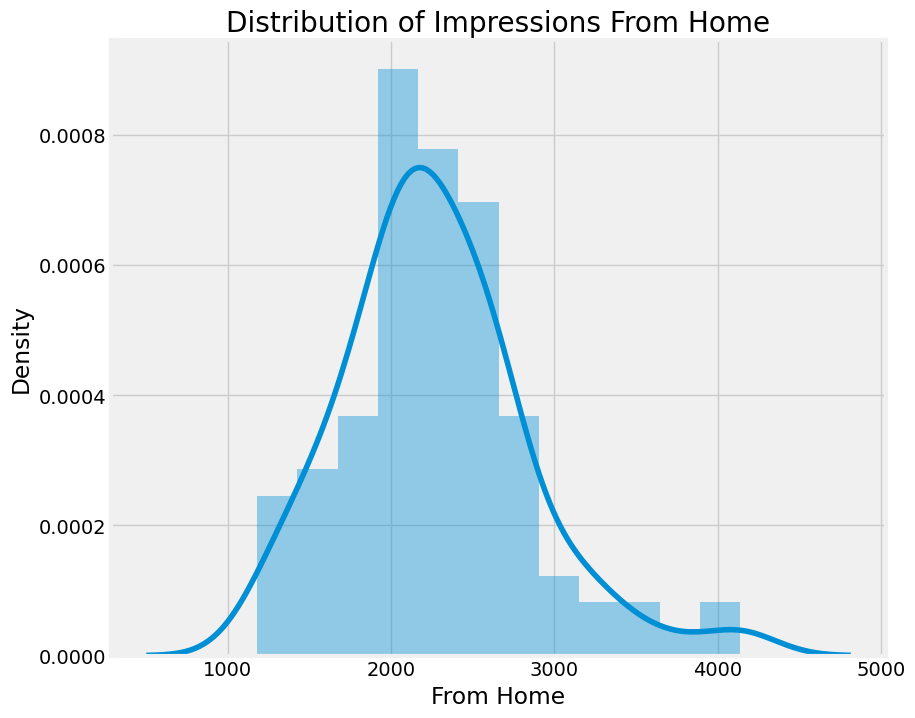

In [15]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


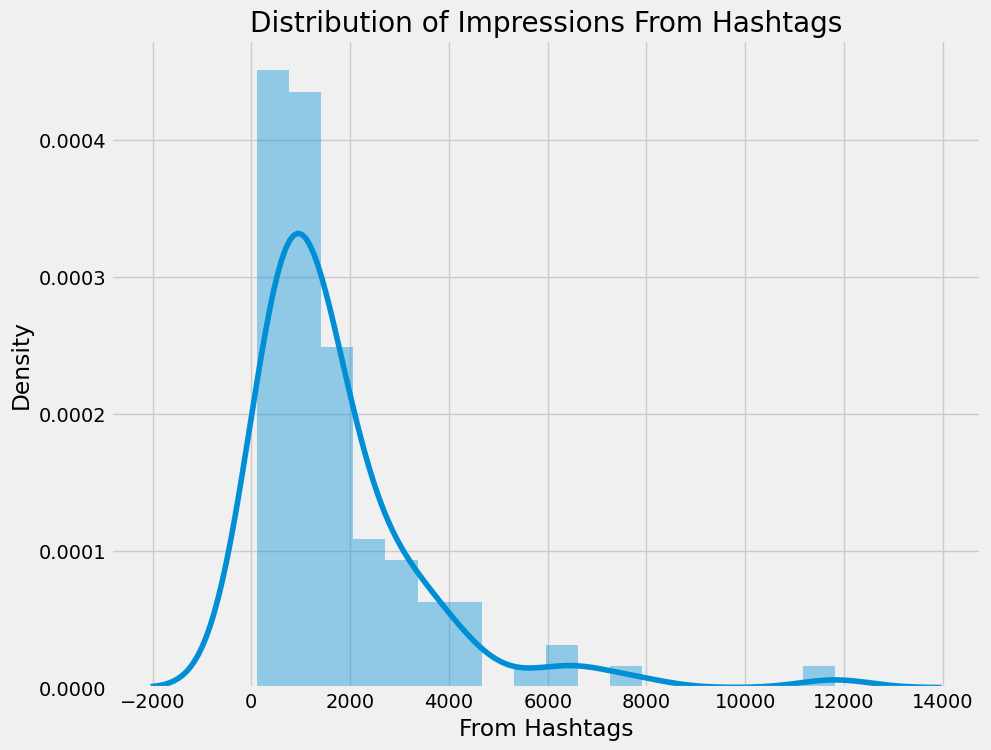

In [16]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


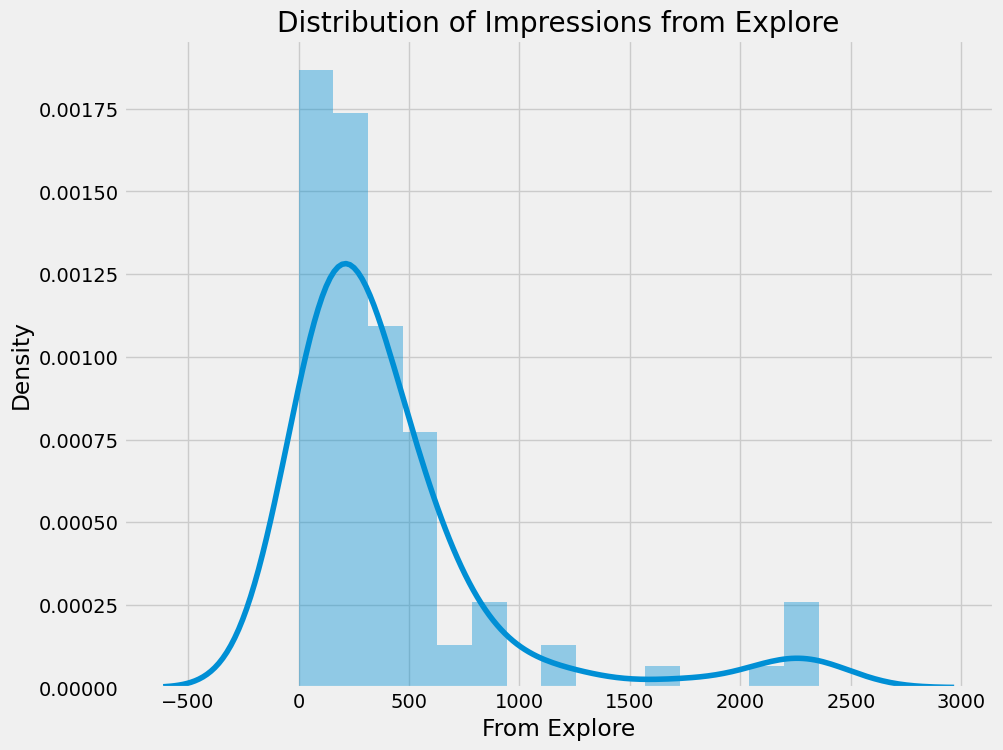

In [19]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Impressions from Explore')
sns.distplot(data['From Explore'])
plt.show()

In [21]:
home = data['From Home'].sum()
hashtags = data['From Hashtags'].sum()
explore = data['From Explore'].sum()
other = data['From Other'].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
values = [home, hashtags, explore, other]

fig = px.pie(data , values=values, names=labels, title='Impressions on Instagram Posts from various sources ', hole=0.5)

fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hole': 0.5,
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['From Home', 'From Hashtags', 'From Explore', 'From Other'],
                              dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([224513., 172087.,  41287.,  13587.])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Impressions on Instagram Posts from various sources '}}
})

<module 'matplotlib.pyplot' from 'c:\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

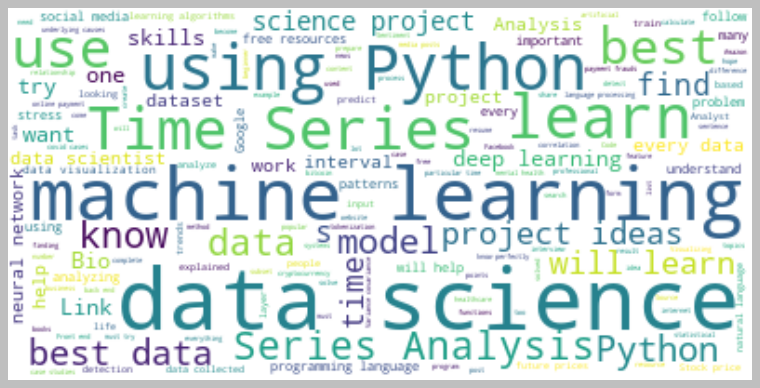

In [24]:
text = ' '.join(i for i in data.Caption)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.style.use('classic')
plt.figure(figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt

<module 'matplotlib.pyplot' from 'c:\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

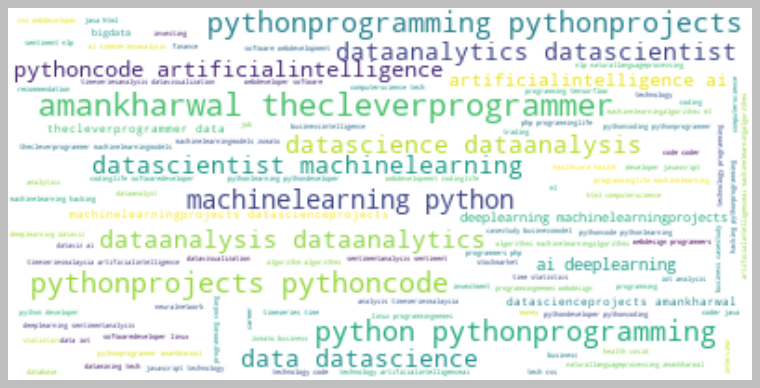

In [25]:
text = ' '.join(i for i in data.Hashtags)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.style.use('classic')
plt.figure(figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt

In [30]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
data

ModuleNotFoundError: No module named 'statsmodels'